# Chapter 45: Value and Policy Iterations

### This code generates figure 4 for Chapter 45: Value and Policy Iterations (vol. II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 45.3 (Illustrating the value iteration for POMDPs)

We illustrate the operation of the value iteration  (45.98) by considering the two-state MDP with two actions shown in Fig. 45.2. We set the discount factor to $\gamma=0.9$. The states are denoted by $\{s_1,s_2\}$ and the actions by $\{a_1,a_2\}$. The initial belief vector is 

$
b_0=\begin{bmatrix}\mathbb{P}(s=s_1)\\ \mathbb{P}(s=s_2) \end{bmatrix} = \begin{bmatrix}1/4\\3/4 \end{bmatrix}
$

The observation signal $o\in\{0,1\}$ is binary with emission probabilities:

$
{\cal B}(s_1,o=1)=\mathbb{P}(o=1|s=s_1)=0.6\\
{\cal B}(s_1,o=0)=\mathbb{P}(o=0|s=s_1)=0.4\\
{\cal B}(s_2,o=1)=\mathbb{P}(o=1|s=s_2)=0.3\\
{\cal B}(s_2,o=1)=\mathbb{P}(o=0|s=s_2)=0.7
$

The arrows in the figure show the transitions that occur when actions $a_1$ or $a_2$ are taken. For example, when the MDP is at state $s_1$ and action $a_1$ is selected, then the MDP moves with probability 1 to state $s_2$. If, on the other hand, action $a_2$ is selected at state $s_1$, then the MDP moves to state $s_2$ with probability $0.7$ or stays at state $s_1$ with probability $0.3$. Thus, the transition probability kernel is given by

$
{\cal P}(s_1,a_1,s_1)= 0,\;\;\;\;\;\;\;  {\cal P}(s_1,a_1,s_2)=1\\
{\cal P}(s_1,a_2,s_1)= 0.3,\;\;\;\;{\cal P}(s_1,a_2,s_2)=0.7\\
{\cal P}(s_2,a_1,s_1)= 1,\;\;\;\;\;\;\;  {\cal P}(s_2,a_1,s_2)=0\\
{\cal P}(s_2,a_2,s_1)= 0.6,\;\;\;\;{\cal P}(s_2,a_2,s_2)=0.4
$

We assume the rewards are state-dependent and set them to $r(s_1)=2$ and $r(s_2)=1$. We start from $v_0^{\star}(b)=0$ for all belief vectors $b$; these are two dimensional vectors in the probability simplex in $\mathbb{R}^2$.

$\textbf{first iteration } k = 1$

Any belief vector $b$ can be parameterized in the form 

$
b=\begin{bmatrix}p\\1-p \end{bmatrix}
$

for some scalar $p\in[0,1]$. Using (45.92a)--(45.92b) we have 


$
r(b,a_1)=b(s_1){\cal P}(s_1,a_1,s_1)r(s_1) + b(s_1){\cal P}(s_1,a_1,s_2)r(s_2)+\\
b(s_2){\cal P}(s_2,a_1,s_1)r(s_1) + b(s_2){\cal P}(s_2,a_1,s_2)r(s_2)\\
=(p\times0\times 2) + (p\times 1\times 1)+((1-p)\times 1\times 2) + ((1-p)\times 0\times 1)\\
=2-p
$

and

$
r(b,a_2)=b(s_1){\cal P}(s_1,a_2,s_1)r(s_1) + b(s_1){\cal P}(s_1,a_2,s_2)r(s_2)+\\
b(s_2){\cal P}(s_2,a_2,s_1)r(s_1) + b(s_2){\cal P}(s_2,a_2,s_2)r(s_2)\\
= (p\times0.3\times 2) + (p\times 0.7\times 1)+((1-p)\times 0.6\times 2) + ((1-p)\times 0.4\times 1)\\
=1.6-0.3p
$

Observe that the expressions for $r(b,a_1)$ and $r(b,a_2)$ are both linear in the parameter $p$. Their values would agree at 

$
2-p=1.6-0.3p \;\Longleftrightarrow\;p=4/7
$

The linear curves are shown in Fig. 45.3; they intersect at location $p=4/7$. According to the value iteration (45.98), we need to choose the maximum over the actions $\{a_1,a_2\}$ since 

$
v_1^{\star}(b)\;=\;\max_{a\in\{a_1,a_2\}}\;\Bigl\{r(b,a_1),\,r(b,a_2)\Bigr\}
$

 Doing so results in the thick dark piece-wise segment shown in the figure. Note that the value function, $v_1^{\star}(\cdot)$, is a function of the parameter $p$ as well and we could write $v_1^{\star}(p)$ if desired as in the figure:

$
v_1^{\star}(b)=\left\{
\begin{array}{ll}
2-p,&\textnormal{ if } p\leq 4/7\\
1.6-0.3p,&\textnormal{ if } p> 4/7
\end{array}
\right.,\;\;\;\textnormal{ where}\;\;b\overset{\Delta}{=} \begin{bmatrix}p\\1-p \end{bmatrix}
$


Moreover, the optimal action at the first iteration is dependent on the value of $b$ or $p$:

$
a_0^{\star}(b)=\left\{
\begin{array}{ll}
a_1,&\textnormal{ if } p\leq 4/7\\
a_2,&\textnormal{ if }p> 4/7
\end{array}
\right.
$


These expressions indicate what the optimal value function and action should be for any value of the argument $p\in[0,1]$ (i.e., for any belief vector $b$).

$\textbf{second iteration } k = 2$

We now use (45.92b) to find

$
\mathbb{P}(o'=1|b,a_1)\\
=b(s_1){\cal P}(s_1,a_1,s_1){\cal B}(s_1,o'=1)+
b(s_1){\cal P}(s_1,a_1,s_2){\cal B}(s_2,o'=1)+\\
\;\;\;\; b(s_2){\cal P}(s_2,a_1,s_1){\cal B}(s_1,o'=1)+
b(s_2){\cal P}(s_2,a_1,s_2){\cal B}(s_2,o'=1)\\
=(p\times 0\times 0.6)+ (p\times 1\times 0.3)+((1-p)\times 1\times 0.6)+((1-p)\times 0\times 0.3)\\
=0.6-0.3p
$

$
\mathbb{P}(o'=0|b,a_1)\\
=b(s_1){\cal P}(s_1,a_1,s_1){\cal B}(s_1,o'=0)+
b(s_1){\cal P}(s_1,a_1,s_2){\cal B}(s_2,o'=0)+\\
\;\;\;\; b(s_2){\cal P}(s_2,a_1,s_1){\cal B}(s_1,o'=0)+
b(s_2){\cal P}(s_2,a_1,s_2){\cal B}(s_2,o'=0)\\
=(p\times 0\times 0.4)+ (p\times 1\times 0.7)+((1-p)\times 1\times 0.4)+((1-p)\times 0\times 0.7)\\
=0.4+0.3p\\
$

$
\mathbb{P}(o'=1|b,a_2)\\
=b(s_1){\cal P}(s_1,a_2,s_1){\cal B}(s_1,o'=1)+
b(s_1){\cal P}(s_1,a_2,s_2){\cal B}(s_2,o'=1)+\\
\;\;\;\; b(s_2){\cal P}(s_2,a_2,s_1){\cal B}(s_1,o'=1)+
b(s_2){\cal P}(s_2,a_2,s_2){\cal B}(s_2,o'=1)\\
=(p\times 0.3\times 0.6)+ (p\times 0.7\times 0.3)+((1-p)\times 0.6\times 0.6)+((1-p)\times 0.4\times 0.3)\\
=0.48-0.09p\\
$

$
\mathbb{P}(o'=0|b,a_2)\\
=b(s_1){\cal P}(s_1,a_2,s_1){\cal B}(s_1,o'=0)+
b(s_1){\cal P}(s_1,a_2,s_2){\cal B}(s_2,o'=0)+\\
\;\;\;\; b(s_2){\cal P}(s_2,a_2,s_1){\cal B}(s_1,o'=0)+
b(s_2){\cal P}(s_2,a_2,s_2){\cal B}(s_2,o'=0)\\
=(p\times 0.3\times 0.4)+ (p\times 0.7\times 0.7)+((1-p)\times 0.6\times 0.4)+((1-p)\times 0.4\times 0.7)\\
=0.52+0.09p
$


We also need to determine $v_1^{\star}(b')$ where $b'$ is computed from $b$ and $o'$, for the various possibilities of $o'$ and action $a$:\\

$ \textbf{(a) case } (a = a_1, 0' = 1): $

$
b'(s_1)\\
=\frac{1}{\mathbb{P}(o'=1|b,a_1)}\Bigl\{b(s_1){\cal P}(s_1,a_1,s_1){\cal B}(s_1,o'=1)+
b(s_2){\cal P}(s_2,a_1,s_1){\cal B}(s_1,o'=1)\Bigr\}\\
=\frac{1}{0.6-0.3p}\Bigl(p\times 0\times 0.6 + (1-p)\times 1\times0.6\Bigr)\\
=\frac{0.6-0.6p}{0.6-0.3p}
$

and

$
b'(s_2)\\=\frac{1}{\mathbb{P}(o'=1|b,a_1)}\Bigl\{b(s_1){\cal P}(s_1,a_1,s_2){\cal B}(s_2,o'=1)+
b(s_2){\cal P}(s_2,a_1,s_2){\cal B}(s_2,o'=1)\Bigr\}\\
=\frac{1}{0.6-0.3p}\Bigl(p\times 1\times 0.3 + (1-p)\times 0\times 0.3\Bigr)\\
=\frac{0.3p}{0.6-0.3p}
$

so that the belief vector under this case is 

$
b'=\frac{1}{0.6-0.3p}\begin{bmatrix}0.6-0.6p\\0.3p\end{bmatrix},\;\;\;\;(a=a_1,o'=1)
$

If we now refer to the general form of $v_1^{\star}(b)$ given in (45.107), we find that at $b'$:

$
v_1^{\star}(b')=\left\{
\begin{array}{ll}
2-\dfrac{0.6-0.6p}{0.6-0.3p},&\textnormal{ if } \dfrac{0.6-0.6p}{0.6-0.3p}\leq 4/7\\\\
1.6-0.3\Bigl(\dfrac{0.6-0.6p}{0.6-0.3p}\Bigr),&\textnormal{ otherwise}
\end{array}
\right.
$

or, equivalently, 

$
v_1^{\star}(b')=\dfrac{1}{0.6-0.3p}\left\{
\begin{array}{ll}
0.6,&\textnormal{ if } p\geq 0.6\\\\
0.78-0.3p,&\textnormal{ otherwise}
\end{array}
\right.,\;\;\;\;(a=a_1,o'=1)
$

$ \textbf{(b) case } (a = a_1, 0' = 0): $

$
b'(s_1)\\
=\frac{1}{\mathbb{P}(o'=0|b,a_1)}\Bigl\{b(s_1){\cal P}(s_1,a_1,s_1){\cal B}(s_1,o'=0)+
b(s_2){\cal P}(s_2,a_1,s_1){\cal B}(s_1,o'=0)\Bigr\}\\
=\frac{1}{0.4+0.3p}\Bigl(p\times 0\times 0.4 + (1-p)\times 1\times0.4\Bigr)\\
=\frac{0.4-0.4p}{0.4+0.3p}
$

and

$
b'(s_2)\\=\frac{1}{\mathbb{P}(o'=0|b,a_1)}\Bigl\{b(s_1){\cal P}(s_1,a_1,s_2){\cal B}(s_2,o'=0)+
b(s_2){\cal P}(s_2,a_1,s_2){\cal B}(s_2,o'=0)\Bigr\}\\
=\frac{1}{0.4+0.3p}\Bigl(p\times 1\times 0.7 + (1-p)\times 0\times 0.7\Bigr)\\
=\frac{0.7p}{0.4+0.3p}
$

so that the belief vector under this case is 

$
b'=\frac{1}{0.4+0.3p}\begin{bmatrix}0.4-0.4p\\0.7p\end{bmatrix},\;\;\;\;(a=a_1,o'=0)
$

If we now refer to the general form of $v_1^{\star}(b)$ given in (45.107), we find that at $b'$:

$
v_1^{\star}(b')=\dfrac{1}{0.4+0.3p}\left\{
\begin{array}{ll}
0.4+p,&\textnormal{ if } p\geq 0.3 \\\\
0.52+0.6p,&\textnormal{ otherwise}
\end{array}
\right.,\;\;\;\;(a=a_1,o'=0)
$

$ \textbf{(c) case } (a = a_2, 0' = 1): $

$
b'(s_1)\\
=\frac{1}{\mathbb{P}(o'=1|b,a_2)}\Bigl\{b(s_1){\cal P}(s_1,a_2,s_1){\cal B}(s_1,o'=1)+
b(s_2){\cal P}(s_2,a_2,s_1){\cal B}(s_1,o'=1)\Bigr\}\\
=\frac{1}{0.48-0.09p}\Bigl(p\times 0.3\times 0.6 + (1-p)\times 0.6\times0.6\Bigr)\\
=\frac{0.36-0.18p}{0.48-0.09p}
$

and

$
b'(s_2)\\=\frac{1}{\mathbb{P}(o'=1|b,a_2)}\Bigl\{b(s_1){\cal P}(s_1,a_2,s_2){\cal B}(s_2,o'=1)+
b(s_2){\cal P}(s_2,a_2,s_2){\cal B}(s_2,o'=1)\Bigr\}\\
=\frac{1}{0.48-0.09p}\Bigl(p\times 0.7\times 0.3 + (1-p)\times 0.4\times 0.3\Bigr)\\
=\frac{0.12+0.09p}{0.48-0.09p}
$

so that the belief vector under this case is 

$
b'=\frac{1}{0.48-0.09p}\begin{bmatrix}0.36-0.18p\\0.12+0.09p\end{bmatrix},\;\;\;\;(a=a_2,o'=1)
$

If we now refer to the general form of $v_1^{\star}(b)$ given in (45.107), we find that at $b'$:

$
v_1^{\star}(b')=\dfrac{1}{0.48-0.09p}\left\{
\begin{array}{ll}
0.6,&\textnormal{ if } p\geq 2/3\\\\
0.66-0.09p,&\textnormal{ otherwise}
\end{array}
\right.,\;\;\;\;(a=a_2,o'=1)
$ 

$ \textbf{(d) case } (a = a_2, 0' = 0): $

$
b'(s_1)\\
=\frac{1}{\mathbb{P}(o'=0|b,a_2)}\Bigl\{b(s_1){\cal P}(s_1,a_2,s_1){\cal B}(s_1,o'=0)+
b(s_2){\cal P}(s_2,a_2,s_1){\cal B}(s_1,o'=0)\Bigr\}\\
=\frac{1}{0.52+0.09p}\Bigl(p\times 0.3\times 0.4 + (1-p)\times 0.6\times0.4\Bigr)\\
=\frac{0.24-0.12p}{0.52+0.09p}
$

and

$
b'(s_2)\\=\frac{1}{\mathbb{P}(o'=0|b,a_2)}\Bigl\{b(s_1){\cal P}(s_1,a_2,s_2){\cal B}(s_2,o'=0)+
b(s_2){\cal P}(s_2,a_2,s_2){\cal B}(s_2,o'=0)\Bigr\}\\
=\frac{1}{0.52+0.09p}\Bigl(p\times 0.7\times 0.7 + (1-p)\times 0.4\times 0.7\Bigr)\\
=\frac{0.28+0.21p}{0.52+0.09p}
$

so that the belief vector under this case is 

$
b'=\frac{1}{0.52+0.09p}\begin{bmatrix}0.24-0.12p\\0.28+0.21p\end{bmatrix},\;\;\;\;(a=a_2,o'=0)
$

If we again refer to the general form of $v_1^{\star}(b)$ given in (45.107), we find that at $b'$:

$
v_1^{\star}(b')=\dfrac{0.8+0.3p}{0.52+0.09p},\;\;\;\;\forall p,\;\;\;\;(a=a_2,o'=0)
$ 

Returning to the value iteration (45.98), and using the expressions derived above, we have for any $b$:

$
v^{\star}_2(b)=\max_{a\in\{a_1,a_2\}}\;\\
\Bigg\{r(b,a_1)
+\gamma\Bigl[\mathbb{P}(o'=1|b,a_1)v_1^{\star}(b'|a_1,o'=1)+
\mathbb{P}(o'=o|b,a_1)v_1^{\star}(b'|a_1,o'=o)\Bigr],\,\\
\;\;\;r(b,a_2)+\gamma\Bigl[
\mathbb{P}(o'=1|b,a_2)v_1^{\star}(b'|a_2,o'=1)+
\mathbb{P}(o'=o|b,a_2)v_1^{\star}(b'|a_2,o'=o)
\Bigr]\,\Bigg\}\\
$


so that 

$
v^{\star}_2(b)=\max_{p}\;\\
\Bigg\{(2-p)
+0.9\Bigl[0.6\,\mathbb{I}[p\geq 0.6] + (0.78-0.3p)\,\mathbb{I}[p<0.6]+\\
\quad\quad\quad\quad\quad\quad\quad\quad\quad(0.4+p)\,\mathbb{I}[p\geq 0.3]+(0.52+0.6p)\,\mathbb{I}[p<0.3]\Bigr],\,\\
\;\;\;(1.6-0.3p)+0.9\Bigl[0.6\,\mathbb{I}[p\geq 2/3]+ (0.66-0.09p)\mathbb{I}[p<2/3]+0.8+0.3p\Bigr]\Bigg\}\\
$

which simplifies to

$
v^{\star}_2(b)=
\left\{
\begin{array}{ll}
\displaystyle\max_{p}\Bigl\{3.170-0.730p,\,2.914-0.111p\Bigr\},&0\leq p< 0.3\\
\displaystyle\max_{p}\Bigl\{3.062-0.370p,\, 2.914-0.111p\Bigr\},&0.3\leq p< 0.6\\
\displaystyle\max_{p}\Bigl\{2.900-0.100p,\, 2.914-0.111p\Bigr\},&0.6\leq < 2/3\\
\displaystyle\max_{p}\Bigl\{2.900-0.100p,\,2.860-0.030p\Bigr\}, & 2/3\leq p\leq 1
\end{array}
\right.
$

This result illustrates the piecewise linear nature of $v_{2}^{\star}(b)$, as was the case with the previous iterate $v_1^{\star}(b)$. The resulting function is plotted in Fig. 45.4. It is sufficient to illustrate the calculations for the first two steps. The value iterations can be continued for several steps from here as desired. It is clear that the complexity of the computations grows with the iterations as more segmentation of the probability range becomes necessary in order to describe the successive belief value functions. 

In [8]:
n=0

p = np.arange(0, 1, 0.01)
f1 = np.zeros(100)
f2 = np.zeros(100)
f3 = np.zeros(100)
g1 = np.zeros(100)
g2 = np.zeros(100)
v = np.zeros(100)

f1 = 3.17 - 0.73*p
f2 = 3.062 - 0.37*p
f3 = 2.9 - 0.1*p
g1 = 2.914-0.111*p
g2 = 2.860-0.03*p

v = np.stack([f1, f2, f3, g1, g2]).max(axis=0)

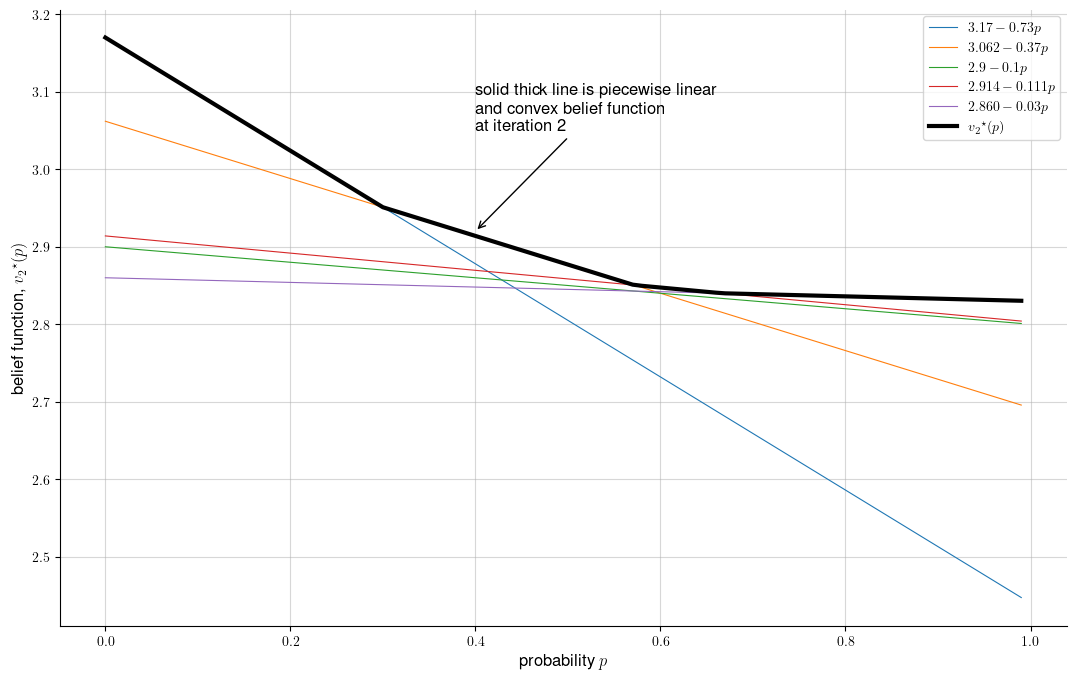

In [30]:
# figure 4 (POMDPs)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(p, f1, linewidth=0.8, label="$3.17 - 0.73p$")
ax.plot(p, f2, linewidth=0.8, label="$3.062 - 0.37p$")
ax.plot(p, f3, linewidth=0.8, label="$2.9 - 0.1p$")
ax.plot(p, g1, linewidth=0.8, label="$2.914 - 0.111p$")
ax.plot(p, g2, linewidth=0.8, label="$2.860 - 0.03p$")

ax.plot(p, v, color="black", linewidth=3, label="${v_2}^{\star}(p)$")

ax.set_xlabel("probability $p$", fontsize=12)
ax.set_ylabel("belief function, ${v_2}^{\star}(p)$", fontsize=12)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate("solid thick line is piecewise linear \n and convex belief function\n at iteration 2", xy=(0.4, 2.92), xytext=(0.4, 3.05), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

plt.legend()

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 45.4** The thick solid line shows the resulting piecewise linear and convex belief value function $v_{2}^{\star}(b)$ that results from the calculation (45.116).